In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd

import sys
sys.path.append("..")
import argparse
from   os.path import abspath
import gc
import os
from file_processing_loc import *
from non_tracking_T_0 import *


In [3]:
path = "data-examples/"
name = "c04_high_density.tsf.xyt"
path_tot = path + name

In [4]:
xyt, xyt_pandas = load_xyt(path_tot)
movie_per_frame, n_unique = convert_to_list(xyt)
dt_theo, t_init, t_end = get_dt(movie_per_frame, n_unique)
sigma, D_high, length_high = get_local_parameters_accessible_elsewhere_in_tramway(dt_theo)


In [5]:
indice   = 55
C        = get_cost_function(indice, movie_per_frame)
#print(C.shape)
C_reduced_corrected, C_reduced, edge, d_max, row_reduced, col_reduced,M,N, n_row_reduced, n_col_reduced,anomaly = correct_cost_function(C,length_high)
#print((n_row_reduced, n_col_reduced))
#print(C_reduced_corrected.shape)
#print((M,N))
assigment, global_row, global_col = get_assigment_matrix_from_reduced_cost(C_reduced_corrected,row_reduced,col_reduced,M,N,n_col_reduced,n_row_reduced,anomaly)
#print((global_row, global_col))

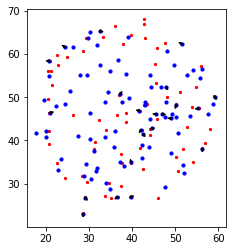

1

In [6]:
plot_linking_two_images(movie_per_frame, indice, global_row, global_col )

In [7]:
liste_assingment, liste_row, liste_col = get_all_assigment_stack(path_tot)

(0, 2001)
(1000, 2001)


In [8]:
indice = 15
print(liste_col[indice+1])

[ 3 10 12 20 19 22 35 33 44 46 51 52 59 50 54 56 63 67 61 73 80 71 82 78
 88 89]


In [9]:
print(liste_assingment[0].shape)

(86, 75)


In [10]:
print(liste_row[0])
print(liste_col[0])

[ 4  6 23 32 43 44 47 48 59 60 63 66 77 78 85]
[ 4  1 20 23 36 31 41 48 54 52 53 58 63 68 74]


In [11]:
print(liste_row[1])
print(liste_col[1])

[ 2  4  9 10 20 29 31 35 40 47 52 53 54 55 58 67]
[ 2 11 16 24 28 41 37 45 46 57 61 68 64 62 71 75]


In [12]:
indice = 50
print(movie_per_frame[indice][liste_row[indice],0])
print(movie_per_frame[indice+1][liste_col[indice],0])

print(movie_per_frame[indice+1][liste_row[indice+1],0])
print(movie_per_frame[indice+2][liste_col[indice+1],0])

[23.2724 21.023  28.4708 24.7533 27.9472 34.1207 37.5283 38.1748 36.5855
 36.4854 39.5693 41.9012 44.4351 43.4851 44.2703 45.5884 46.5944 47.8235
 47.9065]
[23.2232 21.018  28.5066 24.6674 27.9869 34.1819 37.7497 37.9713 36.5684
 36.4393 39.5857 41.7883 44.7076 43.5916 44.3172 45.5043 46.6237 47.7228
 47.838 ]
[20.6409 24.6674 21.018  28.5066 32.6311 35.4913 36.5684 37.9713 41.5046
 39.5857 44.2617 43.2173 43.5916 44.3172 46.6237 47.4609 47.838  47.7228
 53.5513 56.3817]
[20.744  24.5891 21.2689 28.5621 32.7086 35.4241 36.6515 38.0395 41.4111
 39.6865 44.2578 43.2438 43.5216 44.383  46.5797 47.4812 47.9292 47.7948
 53.5193 56.5661]


In [13]:
indice = 50
xyt1 = movie_per_frame[indice]
xyt2 = movie_per_frame[indice+1]
xyt3 = movie_per_frame[indice+2] 
    
row_ind  = liste_row[indice]
col_ind  = liste_col[indice]    
    
row_ind2  = liste_row[indice+1]
col_ind2  = liste_col[indice+1]   

print(xyt1[row_ind,0])
print(xyt2[col_ind,0])
print(xyt2[row_ind2,0])
print(xyt3[col_ind2,0])

[23.2724 21.023  28.4708 24.7533 27.9472 34.1207 37.5283 38.1748 36.5855
 36.4854 39.5693 41.9012 44.4351 43.4851 44.2703 45.5884 46.5944 47.8235
 47.9065]
[23.2232 21.018  28.5066 24.6674 27.9869 34.1819 37.7497 37.9713 36.5684
 36.4393 39.5857 41.7883 44.7076 43.5916 44.3172 45.5043 46.6237 47.7228
 47.838 ]
[20.6409 24.6674 21.018  28.5066 32.6311 35.4913 36.5684 37.9713 41.5046
 39.5857 44.2617 43.2173 43.5916 44.3172 46.6237 47.4609 47.838  47.7228
 53.5513 56.3817]
[20.744  24.5891 21.2689 28.5621 32.7086 35.4241 36.6515 38.0395 41.4111
 39.6865 44.2578 43.2438 43.5216 44.383  46.5797 47.4812 47.9292 47.7948
 53.5193 56.5661]


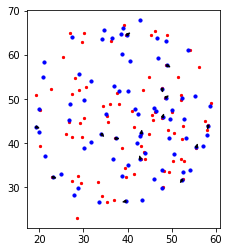

1

In [14]:
indice = 0
plot_linking_from_list(movie_per_frame, indice, liste_row, liste_col )

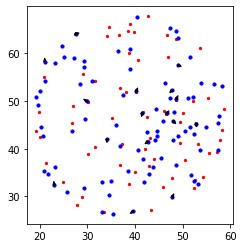

1

In [15]:
indice = 1
plot_linking_from_list(movie_per_frame, indice, liste_row, liste_col )

In [16]:
CC = get_cost_function(55, movie_per_frame)

In [17]:
print(CC[3,0])

47.92670856999991


In [18]:
indice  = 3
indice2 = 0

x2 = movie_per_frame[55+1][indice2,0]
x1 = movie_per_frame[55][indice,0]

y2 = movie_per_frame[55+1][indice2,1]
y1 = movie_per_frame[55][indice,1]

dx = x2 - x1
dy = y2 - y1

C  = dx**2 + dy**2
print(C)

47.92670856999991


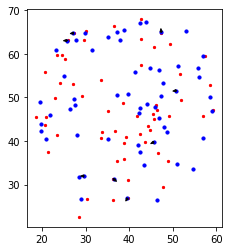

1

In [19]:
indice = 1234
plot_linking_from_list(movie_per_frame, indice, liste_row, liste_col )

In [20]:
path_file = '/Users/jbmasson/Desktop/test_displacement.txt'
liste_array  = position_and_displacement_from_assignment(liste_assingment, liste_row, liste_col,movie_per_frame,path_file)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jbmasson/Desktop/test_displacement.txt'

In [ ]:
liste_array.shape

In [ ]:
np.size(liste)

In [ ]:
liste2  = np.vstack(liste)

In [ ]:
liste2.shape

In [ ]:
np.size([])

In [ ]:
indice =15257
print(liste_row[indice])
print(liste_col[indice])
plot_linking_two_images(movie_per_frame, indice, liste_row[indice], liste_col[indice] )

In [ ]:
print((M,N))

In [ ]:
row_eff

In [ ]:
col_eff

In [ ]:
ssingment  = np.zeros((M,N))

In [ ]:
ssingment.shape

In [ ]:
row_ind, col_ind = linear_sum_assignment(C_reduced_corrected)
global_row       = []
global_col       = []
assingment       = np.zeros((M,N))

In [ ]:
row_ind

In [ ]:
col_ind

In [ ]:
# adjust the isze of the matrix to ensure reasonnable assugments
edge             = np.zeros((nn,nn)) 
edge[:,:]        = C_reduced[:,:]
non_inf          = ~np.isinf(C_reduced)
edge[non_inf]    = 0
n_add            = correct_deficiencies(edge)
nn               = nn + n_add
## corrected matric cost function 

In [ ]:
C_reduced

In [ ]:
indice = 18907

In [ ]:
C        = get_cost_function(indice, movie_per_frame)
C_reduced_corrected, C_reduced, edge, d_max, row_reduced, col_reduced,M,N, n_row_reduced, n_col_reduced,anomaly = correct_cost_function(C,length_high)

In [ ]:
C        = get_cost_function(indice, movie_per_frame)

In [ ]:
(M,N)            = C.shape
# cut the links
l2               = length_high**2
C[C>l2]          = np.inf
# positions whith no link possible
non_inf          = ~np.isinf(C)
num_col          = np.sum(non_inf,axis=0)
num_row          = np.sum(non_inf,axis=1)
## portion that need to be optimised
row_reduced      = np.where(num_row != 0);
col_reduced      = np.where(num_col != 0);
n_row_reduced    = np.size(row_reduced)
n_col_reduced    = np.size(col_reduced)

nn               = np.maximum(n_row_reduced,n_col_reduced)

In [ ]:
CC               = np.squeeze(C[row_reduced,:])
CC               = np.squeeze(CC[:,col_reduced])
#square the matrix
nn               = np.maximum(n_row_reduced,n_col_reduced)
C_reduced        = np.zeros((nn,nn))
#C_reduced        = np.full((nn, nn), np.inf)
C_reduced[0:n_row_reduced,0] = CC[:]
d_max            = np.amax(C_reduced , where=~np.isinf(C_reduced) , initial=-1)

# adjust the isze of the matrix to ensure reasonnable assugments
edge             = np.zeros((nn,nn)) 
edge[:,:]        = C_reduced[:,:]
non_inf          = ~np.isinf(C_reduced)
edge[non_inf]    = 0
n_add            = correct_deficiencies(edge)
nn               = nn + n_add
## corrected matric cost function 

C_reduced_corrected  = np.ones((nn,nn))*d_max
C_reduced_corrected[0:n_row_reduced,0] =  CC[:]
##elements usefull for final assigment 

row_reduced      = np.squeeze(np.array(row_reduced))
col_reduced      = np.squeeze(np.array(col_reduced))

inf_loc          = np.isinf(C_reduced_corrected)
C_reduced_corrected[inf_loc] = d_max*1e10
anomaly          = 1


In [ ]:
C_reduced_corrected

In [ ]:
C_reduced_corrected

In [ ]:
C_reduced

In [ ]:
C_reduced[0:n_row_reduced,0] = CC[:,:]

In [ ]:
row_ind, col_ind = linear_sum_assignment(C_reduced_corrected)

In [ ]:
print((M,N))

In [ ]:
assigment, global_row, global_col = get_assigment_matrix_from_reduced_cost(C_reduced_corrected,row_reduced,col_reduced,M,N,n_col_reduced,anomaly)

In [ ]:
##elements usefull for final assigment 

row_reduced      = np.squeeze(np.array(row_reduced))
col_reduced      = np.squeeze(np.array(col_reduced))

if nn>1:
    inf_loc          = np.isinf(C_reduced_corrected)
    C_reduced_corrected[inf_loc] = d_max*1e10

In [ ]:
test =  np.array([])

In [ ]:
print(test)

In [ ]:
x = np.array([5]) 

In [ ]:
x.shape

In [ ]:
xx = x[np.newaxis, :]

In [ ]:
xx.shape

In [ ]:
print(xx)

In [ ]:
np.zeros(1).shape

In [ ]:
np.size([])

In [ ]:
np.zeros(1)

In [ ]:
C_bis = np.random.rand(1,10)

In [ ]:
C_bis

In [ ]:
row_ind, col_ind = linear_sum_assignment(C_bis)

In [ ]:
row_ind

In [ ]:
col_ind